# Interpolation

In [1]:
import urllib.request
import hepi 
import numpy as np
from hepi.run import resummino as rs
from hepi.run import spheno as sp
sp.set_path("SPheno")
rs.set_path("resummino")

In [2]:
for a,b in [(2000002,1000022)]:
    for pdf,nlopdf in [("CT14lo","CT14lo")]:
        li = [hepi.Input(hepi.Order.LO,13000,a,b,"slha.in",pdf,nlopdf,1., 1.)]
        #li=hepi.slha_scan_rel(li,lambda r : [["EXTPAR",1,r],["EXTPAR",2,r]],np.linspace(500.,1500.,16*2))

        li=hepi.mass_scan(li,a,np.linspace(500.,1500.,5))
        li=hepi.mass_scan(li,b,np.linspace(500.,1500.,5))
        dl = rs.run(li,True,True)

/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/hepi/hepi/util.py:101: UserWarning: LHAPDF python binding not installed? Make sure you set PYTHONPATH correctly (i.e. correct python version) if you want to compute PDF uncertainties.
  warnings.warn(


QUEUEING TASKS | Checking input:   0%|          | 0/25 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/25 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/25 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/25 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/25 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/25 [00:00<?, ?it/s]

Skipped: 25 Not skipped: 0


QUEUEING TASKS | Running: 0it [00:00, ?it/s]

PROCESSING TASKS | Running: 0it [00:00, ?it/s]

COLLECTING RESULTS | Running: 0it [00:00, ?it/s]

QUEUEING TASKS | Parsing:   0%|          | 0/25 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/25 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/25 [00:00<?, ?it/s]

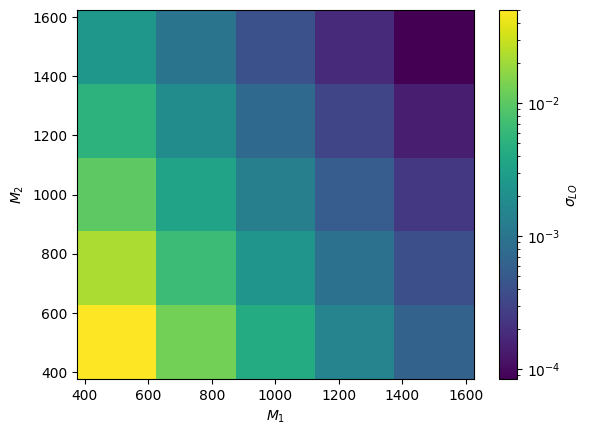

In [3]:
hepi.mapplot(dl,"mass_2000002","mass_1000022","LO",xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{LO}$",show=True)

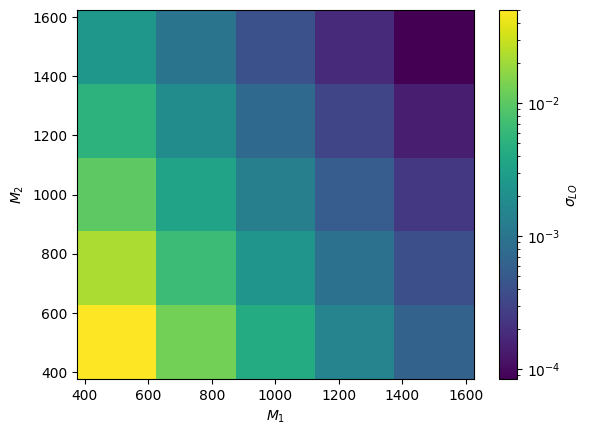

In [4]:
from smpl import data
xx,yy = data.flatmesh(np.linspace(500,1500,5),np.linspace(500,1500,5))
dll = hepi.interpolate_2d(dl,"mass_1000022","mass_2000002","LO",xx,yy,interpolator="linear")
hepi.mapplot(dll,"mass_2000002","mass_1000022","LO",xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{LO}$",show=True,fill_missing=False)
#print(dll["LO"])


In [5]:
(dl["LO"].to_numpy()-dll["LO"].to_numpy())/dl["LO"].to_numpy()

array([0.0+/-0.0016154263871670225,
       1.5539029389273503e-16+/-0.0015909845253920855,
       1.665699711616912e-16+/-0.0015822520490069067,
       0.0+/-0.0015819508546576252, 0.0+/-0.001587055618200895,
       0.0+/-0.0014827480507491498,
       -1.3039619234566496e-16+/-0.001445349985972156,
       1.257633877129178e-16+/-0.0014266141005402125,
       2.384467240468002e-16+/-0.00142076671547182,
       1.1118908908490573e-16+/-0.0014217864616282267,
       0.0+/-0.0014085512991095304,
       1.8508613222236997e-16+/-0.001367325296714199,
       1.6602131115312832e-16+/-0.0013448653411302681,
       1.4892845047421288e-16+/-0.0013341627341690635,
       0.0+/-0.0013314060188204806, 0.0+/-0.001361907903727031,
       -1.1779974384479693e-16+/-0.0013226213444905682,
       0.0+/-0.0012988387152938962, 0.0+/-0.0012854820635719117,
       0.0+/-0.001279159351555103, 0.0+/-0.0013320552441462043,
       0.0+/-0.0012963384696511003,
       2.2802366353531297e-16+/-0.001272302136817206,


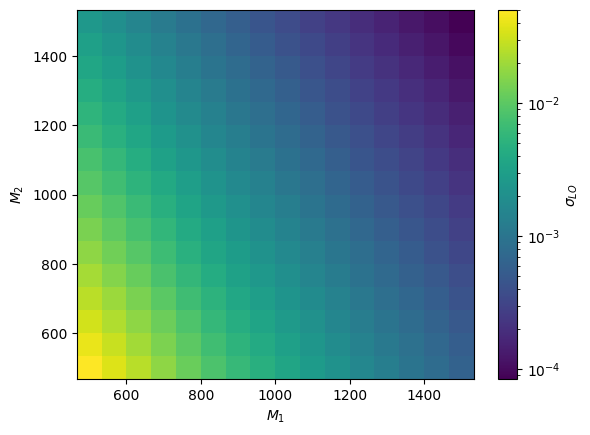

In [6]:
from smpl import data
xx,yy = data.flatmesh(np.linspace(500,1500,16),np.linspace(500,1500,16))
dll = hepi.interpolate_2d(dl,"mass_1000022","mass_2000002","LO",xx,yy,interpolator="cubic")
hepi.mapplot(dll,"mass_2000002","mass_1000022","LO",xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{LO}$",show=True,fill_missing=False)
#print(dll["LO"])

QUEUEING TASKS | Checking input:   0%|          | 0/256 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/256 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/256 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/256 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/256 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/256 [00:00<?, ?it/s]

Skipped: 256 Not skipped: 0


QUEUEING TASKS | Running: 0it [00:00, ?it/s]

PROCESSING TASKS | Running: 0it [00:00, ?it/s]

COLLECTING RESULTS | Running: 0it [00:00, ?it/s]

QUEUEING TASKS | Parsing:   0%|          | 0/256 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/256 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/256 [00:00<?, ?it/s]

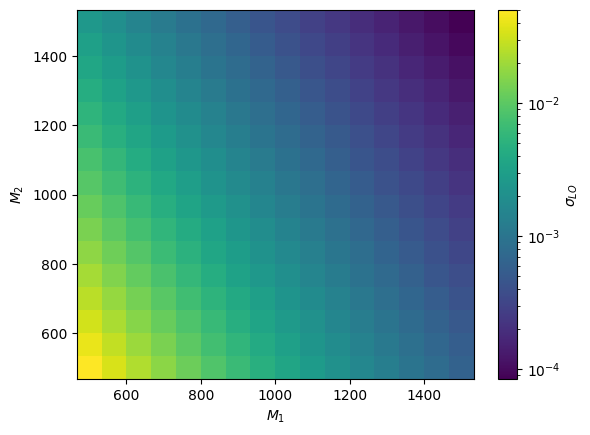

In [7]:
for a,b in [(2000002,1000022)]:
    for pdf,nlopdf in [("CT14lo","CT14lo")]:
        li = [hepi.Input(hepi.Order.LO,13000,a,b,"slha.in",pdf,nlopdf,1., 1.)]
        #li=hepi.slha_scan_rel(li,lambda r : [["EXTPAR",1,r],["EXTPAR",2,r]],np.linspace(500.,1500.,16*2))

        li=hepi.mass_scan(li,a,np.linspace(500.,1500.,16))
        li=hepi.mass_scan(li,b,np.linspace(500.,1500.,16))
        dl2 = rs.run(li,True,True)
hepi.mapplot(dl2,"mass_2000002","mass_1000022","LO",xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{LO}$",show=True)

In [8]:
from smpl import stat

dll = hepi.interpolate_2d(dl,"mass_1000022","mass_2000002","LO",xx,yy,interpolator="cubic")
print(stat.mean(np.abs((dl2["LO"].to_numpy()-dll["LO"].to_numpy())/dl2["LO"].to_numpy())))

dll = hepi.interpolate_2d(dl,"mass_1000022","mass_2000002","LO",xx,yy,interpolator="linear")
print(stat.mean(np.abs((dl2["LO"].to_numpy()-dll["LO"].to_numpy())/dl2["LO"].to_numpy())))

# exponential dependency
dll = hepi.interpolate_2d(dl,"mass_1000022","mass_2000002","LO",xx,yy,interpolator="linear",pre=np.log,post=np.exp)
print(stat.mean(np.abs((dl2["LO"].to_numpy()-dll["LO"].to_numpy())/dl2["LO"].to_numpy())))

dll = hepi.interpolate_2d(dl,"mass_1000022","mass_2000002","LO",xx,yy,interpolator="cubic",pre=np.log,post=np.exp)
print(stat.mean(np.abs((dl2["LO"].to_numpy()-dll["LO"].to_numpy())/dl2["LO"].to_numpy())))

0.013+/-0.013
0.22+/-0.25
0.009+/-0.009
0.0003+/-0.0004


In [9]:
(dl2["LO"].to_numpy()-dll["LO"].to_numpy())/dl2["LO"].to_numpy()

array([-4.127045252457755e-16+/-0.0016154263871672174,
       0.00016204064752268907+/-0.0016061995454346707,
       7.899466661049401e-05+/-0.0015996085411364648,
       1.0198409639045345e-05+/-0.0015943027134069736,
       3.381517514805588e-06+/-0.0015900286956439906,
       1.6429380091850346e-05+/-0.0015867754012363752,
       9.09030429285613e-06+/-0.0015844121424196667,
       2.3257250976972537e-06+/-0.0015828310952028678,
       1.2306804678300649e-06+/-0.0015817809057453059,
       1.2989387602054172e-05+/-0.0015811959210456758,
       1.5105056790539695e-05+/-0.0015812344985740665,
       4.822013005717258e-06+/-0.0015817493174891165,
       -1.8196719976453046e-05+/-0.0015827168599134246,
       -4.17830305696477e-05+/-0.0015840045185745641,
       -4.627067310043878e-05+/-0.0015854661853236416,
       1.3492302996739452e-15+/-0.0015870556181992838,
       -0.0020947948557539843+/-0.0015749271503873875,
       -0.001827234525733222+/-0.0015641792417779151,
       -0.001737

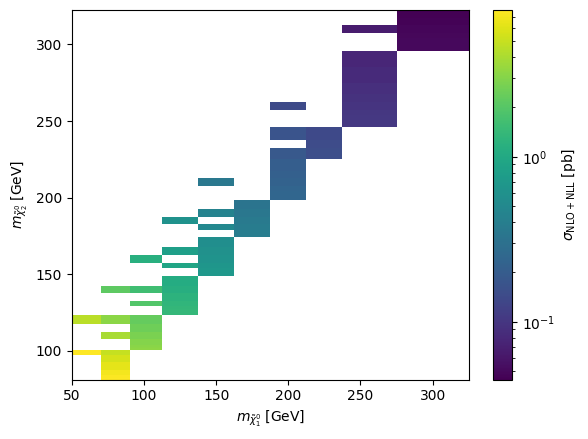

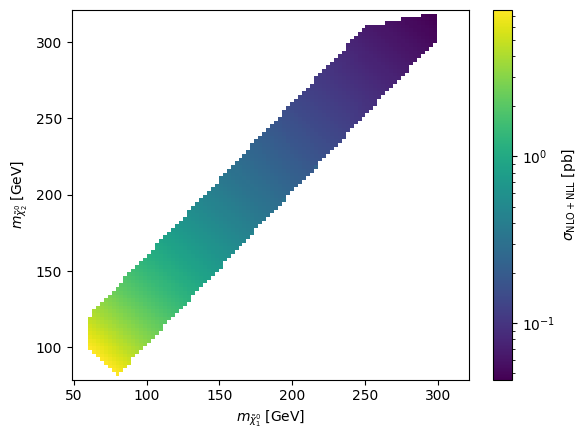

In [10]:
import matplotlib.pyplot as plt

dl = hepi.load(
    urllib.request.urlopen(
        "https://raw.githubusercontent.com/APN-Pucky/xsec/master/json/pp13_hinosplit_N2N1_NLO%2BNLL.json"
    ),
    dimensions=2,
)
hepi.mapplot(dl,"N1","N2","NLO_PLUS_NLL_NOERR",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_2^0}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
plt.show()
xx,yy = data.flatmesh(np.linspace(50,320,100),np.linspace(80,320,100))
dll = hepi.interpolate_2d(dl,"N1","N2","NLO_PLUS_NLL_NOERR",xx,yy,interpolator="linearnd",pre=np.log,post=np.exp)             
hepi.mapplot(dll,"N1","N2","NLO_PLUS_NLL_NOERR",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_2^0}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]",fill_missing=False)
            